In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
df=pd.read_csv("/kaggle/input/craigslist-carstrucks-data/vehicles.csv")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.shape

(426880, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
Col=df.columns
for i in Col:
    print(df[i].value_counts())

7312775165    1
7310416174    1
7316392516    1
7311147589    1
7307281658    1
             ..
7316642868    1
7304055862    1
7311393847    1
7314270665    1
7314872323    1
Name: id, Length: 426880, dtype: int64
https://southcoast.craigslist.org/ctd/d/hyannis-2013-toyota-highlander-limited/7311276935.html        1
https://minneapolis.craigslist.org/dak/ctd/d/jordan-2014-ford-escape-se-159k-miles/7316271467.html    1
https://norfolk.craigslist.org/ctd/d/fredericksburg-2010-infiniti-qx56-owner/7307199684.html          1
https://bakersfield.craigslist.org/ctd/d/fontana-2014-isuzu-npr-eco-max-rwd/7309487167.html           1
https://baltimore.craigslist.org/cto/d/cockeysville-1970-fiat-850-spider/7316344310.html              1
                                                                                                     ..
https://bham.craigslist.org/ctd/d/saginaw-2005-acura-tl/7302801947.html                               1
https://bozeman.craigslist.org/ctd/d/bozeman-2015-ford-f1

In [8]:
df= df.drop(columns=['id','url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long','county','region'], axis=1)

In [9]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


In [10]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [11]:
sort_price=sorted(df["price"])

In [12]:
q1, q2 = np.percentile(sort_price,[10,90])

In [13]:
print(q1,q2)

500.0 37590.0


In [14]:
df=df[(df.price < 27500) & (df.price >= 500 )]
df.shape

(285044, 16)

In [15]:
sort_odometer=sorted(df["odometer"])
sort_odometer

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [16]:
df["odometer"].isna().sum()

1650

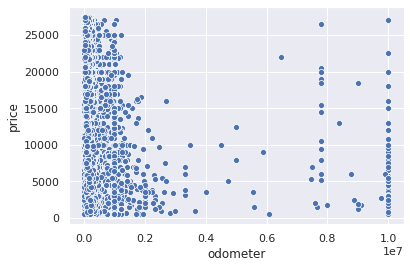

In [17]:
ax = sns.scatterplot(x="odometer", y="price", data=df)

In [18]:
df["odometer"].max()

10000000.0

In [19]:
df.drop(df[df["odometer"]==64809218.0].index,inplace=True)

In [20]:
df.drop(df[df["odometer"]==0.0].index,inplace=True)

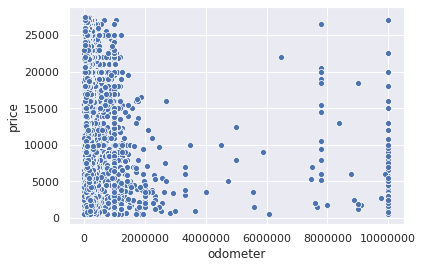

In [21]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [22]:
df["odometer"].isna().sum()

1650

In [23]:
df=df[(df.odometer < 3000000)]

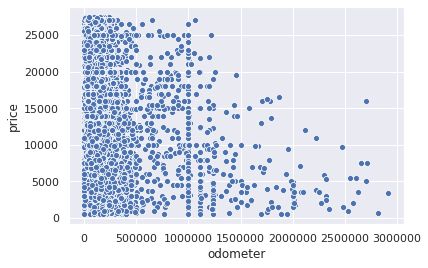

In [24]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [25]:
df["odometer"].isna().sum()

0

In [26]:
df["year"].isna().sum()

339

In [27]:
df["year"].min()

1900.0

In [28]:
df.drop(df[df["year"]==0.0].index,inplace=True)

In [29]:
df=df.dropna(subset=['year'])

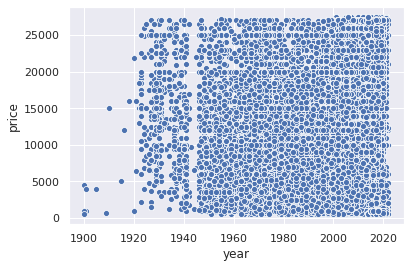

In [30]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [31]:
df=df[(df.year > 1940)]

In [32]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,18943200,67.281
cylinders,10940000,38.856
condition,10460200,37.152
drive,8438300,29.970
paint_color,8380200,29.764
type,6646900,23.608
manufacturer,1046100,3.715
title_status,514300,1.827
model,334100,1.187
fuel,164100,0.583


In [33]:
df.condition.value_counts()

excellent    77753
good         76688
like new     14909
fair          6494
new            573
salvage        536
Name: condition, dtype: int64

In [34]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [35]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 93809.59
Excellent average odometer: 114903.02
Good average odometer: 105998.14
Fair average odometer: 175931.82
Salvage average odometer: 168803.65


In [36]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [37]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [38]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,18943200,67.281
cylinders,10940000,38.856
drive,8438300,29.970
paint_color,8380200,29.764
type,6646900,23.608
manufacturer,1046100,3.715
title_status,514300,1.827
model,334100,1.187
fuel,164100,0.583
transmission,110400,0.392


In [39]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

In [40]:
df=df.drop(["size"],axis=1)

In [41]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)


,null,percent
cylinders,10100400,38.766
drive,7547200,28.967
paint_color,7398000,28.394
type,6068900,23.293
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [42]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')

In [43]:
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [44]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           1
type            0
paint_color     0
state           0
posting_date    0
dtype: int64

In [45]:
df=df.dropna(subset=['cylinders','drive'])

In [46]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
posting_date    0
dtype: int64

In [47]:
from scipy import stats

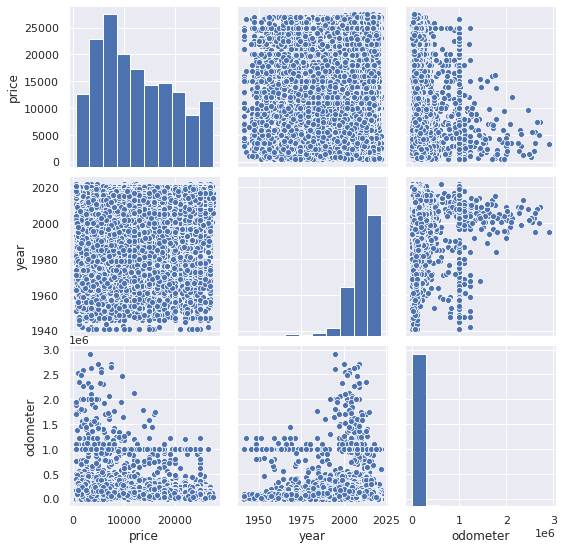

In [48]:
sns.pairplot(df)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260544 entries, 31 to 426875
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         260544 non-null  int64  
 1   year          260544 non-null  float64
 2   manufacturer  260544 non-null  object 
 3   model         260544 non-null  object 
 4   condition     260544 non-null  object 
 5   cylinders     260544 non-null  object 
 6   fuel          260544 non-null  object 
 7   odometer      260544 non-null  float64
 8   title_status  260544 non-null  object 
 9   transmission  260544 non-null  object 
 10  drive         260544 non-null  object 
 11  type          260544 non-null  object 
 12  paint_color   260544 non-null  object 
 13  state         260544 non-null  object 
 14  posting_date  260544 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 41.8+ MB


In [50]:
c=df.columns
for i in c:
    print(df[i].value_counts())

6995     2994
7995     2925
8995     2661
9995     2636
4500     2550
         ... 
1089        1
17481       1
25677       1
9541        1
4098        1
Name: price, Length: 8852, dtype: int64
2013.0    22597
2014.0    19307
2012.0    17634
2015.0    17628
2017.0    16025
          ...  
2022.0       18
1942.0        5
1944.0        3
1945.0        1
1943.0        1
Name: year, Length: 82, dtype: int64
ford               41804
chevrolet          33461
toyota             22854
honda              17595
nissan             14847
jeep               11262
bmw                 9158
dodge               8705
hyundai             8474
gmc                 8384
subaru              7630
volkswagen          7550
kia                 6809
mercedes-benz       6537
ram                 6104
lexus               5086
chrysler            5003
mazda               4199
buick               4177
cadillac            4089
audi                3708
acura               3584
infiniti            2916
mitsubishi        

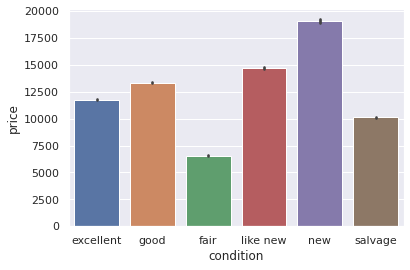

In [51]:
ax = sns.barplot(x="condition", y="price", data=df)

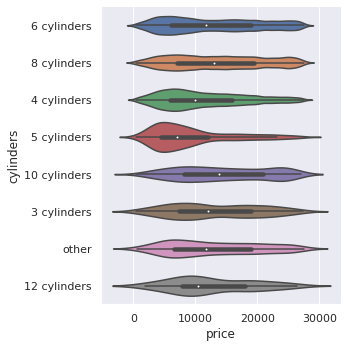

In [52]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

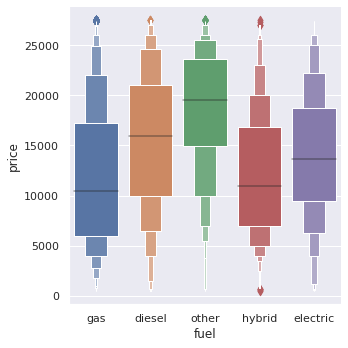

In [53]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

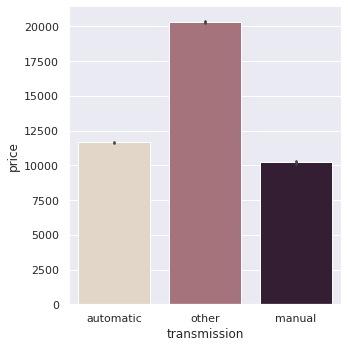

In [54]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

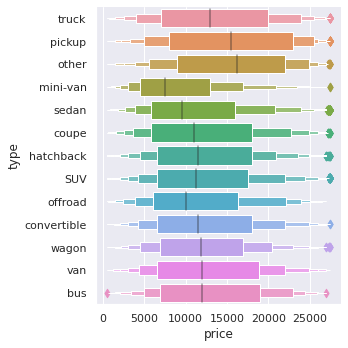

In [55]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

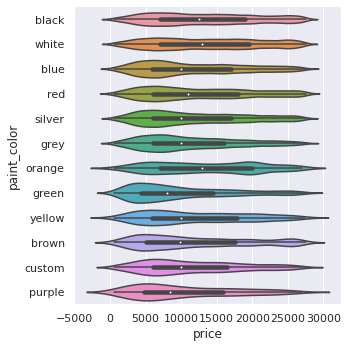

In [56]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

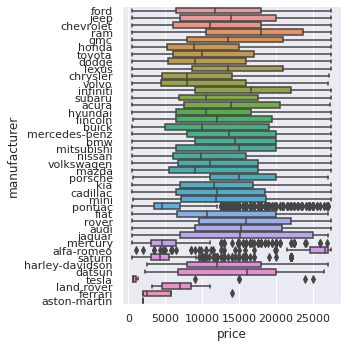

In [57]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

In [58]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [59]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'posting_date'],
      dtype='object')

In [60]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

In [61]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260544 entries, 31 to 426875
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         260544 non-null  int64  
 1   year          260544 non-null  float64
 2   manufacturer  260544 non-null  int64  
 3   model         260544 non-null  int64  
 4   condition     260544 non-null  int64  
 5   cylinders     260544 non-null  int64  
 6   fuel          260544 non-null  int64  
 7   odometer      260544 non-null  float64
 8   title_status  260544 non-null  int64  
 9   transmission  260544 non-null  int64  
 10  drive         260544 non-null  int64  
 11  type          260544 non-null  int64  
 12  paint_color   260544 non-null  int64  
 13  state         260544 non-null  int64  
 14  posting_date  260544 non-null  object 
dtypes: float64(2), int64(12), object(1)
memory usage: 41.8+ MB


In [63]:
y= df.price
X= df.drop(['price', 'posting_date'],axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(208435, 13) (208435,)
(52109, 13) (52109,)


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208435 entries, 237844 to 197706
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          208435 non-null  float64
 1   manufacturer  208435 non-null  int64  
 2   model         208435 non-null  int64  
 3   condition     208435 non-null  int64  
 4   cylinders     208435 non-null  int64  
 5   fuel          208435 non-null  int64  
 6   odometer      208435 non-null  float64
 7   title_status  208435 non-null  int64  
 8   transmission  208435 non-null  int64  
 9   drive         208435 non-null  int64  
 10  type          208435 non-null  int64  
 11  paint_color   208435 non-null  int64  
 12  state         208435 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 22.3 MB


In [67]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)


In [68]:
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [69]:

y_pred = regressor.predict(X_test)

In [70]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [71]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 1848.6
Mean Squared Error: 9101582.9
Root Mean Squared Error: 3016.88
82.68071066311785
